## Starting contingency analysis

In [1]:
addpath('/data/drive/DPhil/THESIS/Cross_study_analyses/learning-repo/scripts')
% load all data sets!
comp='onx';ca=1; pX_analysis_init;


% filter the data
% specify what data to EXCLUDE (this should be a json structure, but
% matlab...
pX_subject_filter;
[SData] = pX_filter_data(sp, 'pX', 1);
subIDs = cellstr(SData.specID);

% It's possible to do the entire analyses using model-generated data 
% data_type = 'real_data', 'RW_3_mle_n20', 'betaStSw_v2g_c_mle_n20',
% 'RW_6_volatility_mle_n20'

data = pX_build_dataset(subIDs, SData, 'real_data',1);


ans =

    '9.6.0.1099231 (R2019a) Update 1'

Running with visit 1 from Losartan!
Raw participants: 116
Excluded for missing anxiety scores:
    'ss11'
    'ss31'

Participans after anx exlc.: 114
Excluded for failure to distinguish harm from safe:
    'f27'
    'm01'
    'm06'
    'm29'
    'm39'
    'pl16'
    'pl20'
    'ss18'
    'ss19'
    'ss7'

Participans after dist exlc.: 104
   pl9 ... excluding for misunderstanding the task
   ss8_bl7525 ... excluding for missing more than 50% of data
   ss4_bl6040 ... excluding for missing more than 50% of data
   m01_v1 ... excluding for missing more than 50% of data
   m13_v1 ... excluding for missing more than 50% of data
   f39_v1 ... excluding for missing more than 50% of data
   f38_v1 ... excluding for missing more than 50% of data
Participans after all exlc.: 98
Loading pre-computed data structure


### without anxiety

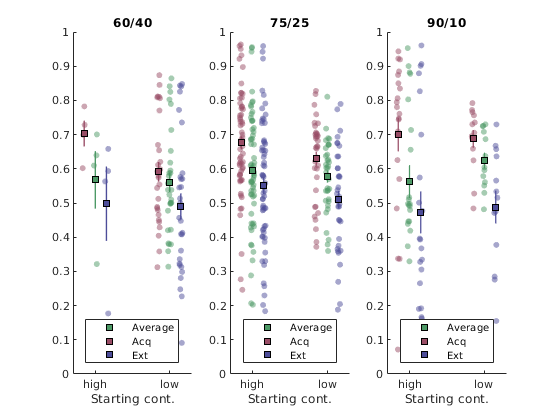

In [2]:
dloc = data(data.half==2 & data.Trial_Type==3 & data.phase~=0,:);

[GS, Gkey, S, Skey, mle] = pX_get_stats(dloc, dloc.prob, {'startprob', 'contingency'});
[GS, Gkey, S_p, Skey_p, mle] = pX_get_stats(dloc, dloc.prob, {'startprob', 'contingency', 'study_str', 'phase_str', 'id'});
%[GS_m, Gkey_m, S_m, Skey_m, mle] = pX_get_stats(dloc, fitted(m1), {'order_str', 'contingency'});
ostr = unique(Gkey.startprob);
cstr = unique(Gkey.contingency);
f=figure;
cf=struct;
cf.opacity =0.5;
cf.legendmark_2 = 'on';
for b = 1:numel(cstr)
    subplot(1,3,b)
    for or = 1:numel(ostr)
        if or == 1; cf.legendmark_2='on'; else cf.legendmark_2='off';end
        id = find( ismember(Skey.startprob,ostr{or}) & ismember(Skey.contingency, cstr{b})  );
        plot_vertical_jittered_column(or, S(id), [0.3 0.6 0.4], cf)
        id_a = find(ismember(Skey_p.phase_str, 'acq') & ismember(Skey_p.startprob,ostr{or}) & ismember(Skey_p.contingency, cstr{b})  );
        plot_vertical_jittered_column(or-0.15, S_p(id_a), [0.6 0.3 0.4], cf)
        id_b = find(ismember(Skey_p.phase_str, 'ext') & ismember(Skey_p.startprob,ostr{or}) & ismember(Skey_p.contingency, cstr{b})  );
        plot_vertical_jittered_column(or+0.15, S_p(id_b), [0.3 0.3 0.6], cf)
        legend('Average', 'Acq', 'Ext', 'location', 'south'); 
    end
    t=gca; t.XTick=1:3; t.XTickLabel=ostr;
    xlabel('Starting cont.');
    ylim([0 1]); xlim([0.7 2.3]);
    title(cstr{b});
end
f.Position(3) = 600;
f.Position(4) = 280;

In [3]:
Skey_p.prob = S_p;
cf= []; 
cf.bycat=1;
cf.cat ={'study_str'};
[m] = pX_report_stats( Skey_p, 'prob', {'startprob', 'contingency', 'study_str', 'phase_str'}, {}, cf);

running normal GLM wihtout random effects
=====MAIN MODEL=====

mm = 


Linear regression model:
    prob ~ [Linear formula with 16 terms in 4 predictors]

Estimated Coefficients:
                                                                       Estimate        SE        tStat       pValue  
                                                                       _________    ________    ________    _________

    (Intercept)                                                           0.6832    0.042013      16.262    8.766e-43
    startprob_low                                                      -0.075529    0.059415     -1.2712      0.20467
    contingency_60/40                                                   0.051225    0.096263     0.53213      0.59504
    contingency_90/10                                                   0.048137    0.053261      0.9038      0.36684
    study_str_study_1                                                   0.013851    0.057911     0.23917      0

### with anxiety

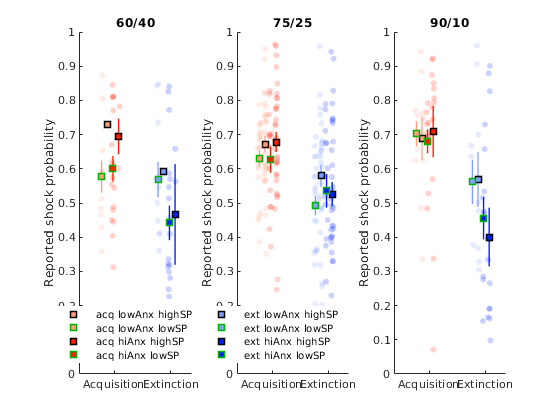

In [4]:
dloc = data(data.half==2 & data.Trial_Type==3 & data.phase~=0,:);
[GS, Gkey, S, Skey, mle] = pX_get_stats(dloc, dloc.prob, {'startprob', 'contingency', 'tabin', 'phase'});
spstr = unique(Skey.startprob);
blocks = {'60/40', '75/25', '90/10'};
f=figure;
cf=struct;
anxstr = {'lowAnx', 'hiAnx'};
phstr ={'acq', 'ext'};
cf.legendmark_2 = 'on';
bcol = [0 0 0; 0 0.7 0];
for b =1:3
    subplot(1,3,b);
    i=1;
    for ph = 1:2
        for an = 1:2
            for sp = 1:length(spstr)
                idx = (ph-1)*2+an;
                id = find( Skey.tabin==an & Skey.phase==ph & ismember(Skey.startprob, spstr{sp}) & ismember(Skey.contingency, blocks{b}) );
                cf.marker_edge = bcol(sp,:);
                cf.marker_width = 1.5;
                plot_vertical_jittered_column(ph+(an-1)*0.2-0.1*(sp-1), S(id), col4(idx,:), cf);
                labels{i} = [phstr{ph} ' ' anxstr{an} ' ' spstr{sp} 'SP'];
                i = i+1;
            end
        end
    end
    if b == 2
        l=legend(labels, 'location', 'south');
        l.NumColumns=2;
        l.EdgeColor=[1 1 1];set(l,'EdgeColor','none');
    end
    ylim([0 1]); xlim([0.5 2.5]);
    t=gca; t.XTick = [1.125,2.125]; t.XTickLabels = {'Acquisition', 'Extinction'};
    title(cstr{b});
    
    f.Position(3) =400;
    ylim([0 1]);
    ylabel('Reported shock probability')
end

f.Position(3) = 700;
f.Position(4) = 280;

> `NaNs` in the results below occur because only study III has all three contingency levels

In [6]:
%STATS 
[GS, Gkey, S, Skey, mle] = pX_get_stats(dloc, dloc.prob, {'startprob', 'contingency', 'study_str', 'ta', 'phase_str'});
Skey.prob = S;
cf= []; 
cf.bycat=1;
cf.cat ={'study_str'};
[m] = pX_report_stats( Skey, 'prob', {'startprob', 'contingency', 'ta', 'study_str', 'phase_str'}, {}, cf);

running normal GLM wihtout random effects
=====MAIN MODEL=====

mm = 


Linear regression model:
    prob ~ [Linear formula with 32 terms in 5 predictors]

Estimated Coefficients:
                                                                           Estimate        SE          tStat       pValue  
                                                                          __________    _________    _________    _________

    (Intercept)                                                              0.54593       0.1928       2.8316    0.0050003
    startprob_low                                                            0.32044      0.30561       1.0485      0.29538
    contingency_60/40                                                         0.3515       0.7309      0.48091      0.63099
    contingency_90/10                                                       -0.10831      0.19695     -0.54991      0.58286
    ta                                                                     